This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Plot on curvelinear grid

## Preface

If you are working with radar station data, it is almost ever only available as polar data.
This means you have a 2D-array, one dimension holding the azimuth (**PPI**) or elevation
(**RHI**) angle values and the other holding the range values.

In $\omega radlib$ it is assumed that the first dimension is over the azimuth/elevation angles,
while the second dimension is over the range bins.

## Create Curvelinear Grid

The creation process of the curvelinear grid is bundled in the helper function [wradlib.vis.create_cg()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.create_cg.html). I will not dwell too much on that, just this far [wradlib.vis.create_cg()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.create_cg.html) uses a derived Axes implementation.

[wradlib.vis.create_cg()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.create_cg.html) takes scan type ('PPI' or 'RHI') as argument, figure object and grid definition are optional. The grid creation process generates three axes objects and set some reasonable starting values for labeling.

The returned objects are ``cgax``, ``caax`` and ``paax``.

- ``cgax``: matplotlib toolkit axisartist Axes object, Curvelinear Axes which holds the angle-range-grid
- ``caax``: matplotlib Axes object (twin to cgax), Cartesian Axes (x-y-grid) for plotting cartesian data
- ``paax``: matplotlib Axes object (parasite to cgax), The parasite axes object for plotting polar data

A typical invocation of [wradlib.vis.create_cg()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.create_cg.html) for a **PPI** is:

```python
    # create curvelinear axes
    cgax, caax, paax = create_cg('PPI', fig, subplot)
```

For plotting actual polar data two functions exist, depending on whether your data holds a **PPI**
[wradlib.vis.plot_ppi()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.plot_ppi.html) or an **RHI** ([wradlib.vis.plot_rhi()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.plot_rhi.html)).

<div class="alert alert-info">

**Note** <br>

1. Other than most plotting functions you cannot give an axes object as an argument. All necessary axes objects are created on the fly. You may give an figure object and/or an subplot specification as parameter. For further information on howto plot multiple cg plots in one figure, have a look at the special section [Plotting on Grids](#Plotting-on-Grids).  <br>
2. When using the ``refrac`` keyword with [wradlib.vis.plot_rhi()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.plot_rhi.html) the data is plotted to the cartesian axis ``caax``.  <br>
</div>

<div class="alert alert-info">
    
**Seealso** <br>

- [wradlib.vis.create_cg()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.create_cg.html) <br>
- [wradlib.vis.plot_ppi()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.plot_ppi.html) <br>
- [wradlib.vis.plot_rhi()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.plot_rhi.html) <br>

If you want to learn more about the matplotlib features used with [wradlib.vis.create_cg()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.create_cg.html), have a look into

- [Matplotlib AXISARTIST namespace](https://matplotlib.org/tutorials/toolkits/axisartist.html) <br>
- [Matplotlib AxesGrid Toolkit](https://matplotlib.org/api/toolkits/axes_grid1.html) <br>
- [The Matplotlib AxesGrid Toolkit User’s Guide](https://matplotlib.org/tutorials/toolkits/axes_grid.html) <br>
</div>

## Plotting on Curvelinear Grids

### Plot CG PPI

[wradlib.vis.plot_ppi()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.plot_ppi.html) with keyword `cg=True` is used in this section.

#### Simple CG PPI

First we will look into plotting a **PPI**. We start with importing the necessary modules:

In [1]:
import wradlib as wrl
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

Next, we will load a polar scan from the WRADLIB_DATA folder and prepare it:

In [2]:
# load a polar scan 
filename = wrl.util.get_wradlib_data_file('misc/polar_dBZ_tur.gz')
data = np.loadtxt(filename)

# create range and azimuth arrays accordingly
r = np.arange(0, data.shape[1], dtype=np.float)
r += (r[1] - r[0]) / 2.
r *= 1000.
az = np.arange(0, data.shape[0], dtype=np.float)
az += (az[1] - az[0]) / 2.

# mask data array for better presentation
mask_ind = np.where(data <= np.nanmin(data))
data[mask_ind] = np.nan
ma = np.ma.array(data, mask=np.isnan(data))

For this simple example, we do not need the returned axes. The plotting routine would be invoked like this:

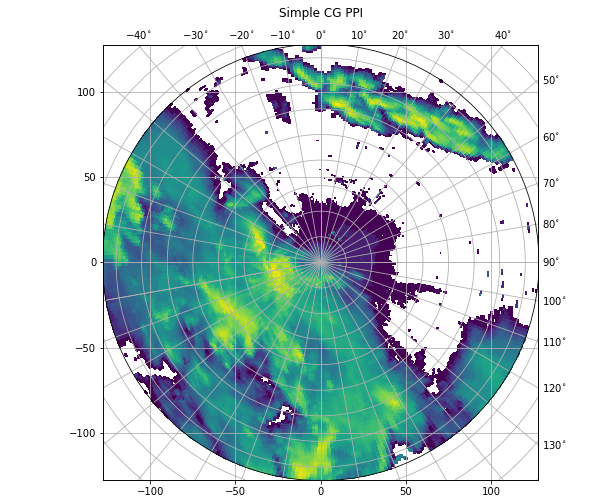

In [3]:
fig = pl.figure(figsize=(10,8))
ax, pm = wrl.vis.plot_ppi(ma, fig=fig, proj='cg')
caax = ax.parasites[0]
paax = ax.parasites[1]
ax.parasites[1].set_aspect('equal')
t = pl.title('Simple CG PPI', y=1.05)

### Decorated CG PPI

Now we will make use of some of the capabilities of this curvelinear axes.

You see, that for labeling x- and y-axis the cartesian axis is used. The `azimuth` label
is set via :func:`text`. Also a colorbar is easily added. The plotting routine would be invoked like this, adding range and azimuth arrays:

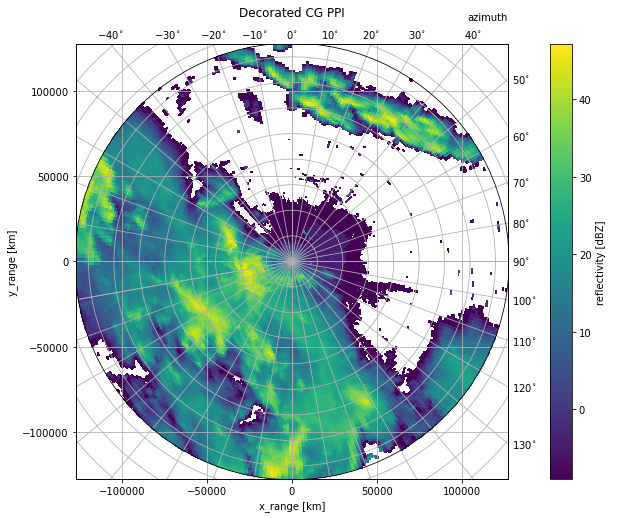

In [4]:
fig = pl.figure(figsize=(10,8))
cgax, pm = wrl.vis.plot_ppi(ma, r=r, az=az, fig=fig, proj='cg')
caax = cgax.parasites[0]
paax = cgax.parasites[1]

pl.title('Decorated CG PPI', y=1.05)
cbar = pl.colorbar(pm, pad=0.075, ax=paax)
caax.set_xlabel('x_range [km]')
caax.set_ylabel('y_range [km]')
pl.text(1.0, 1.05, 'azimuth', transform=caax.transAxes, va='bottom', 
        ha='right')
cbar.set_label('reflectivity [dBZ]')

And, we will use `cg` keyword to set the starting value for the curvelinear grid. This is because data at the center of the image is obscured by the gridlines. We also adapt the `radial_spacing` to better align the two grids.

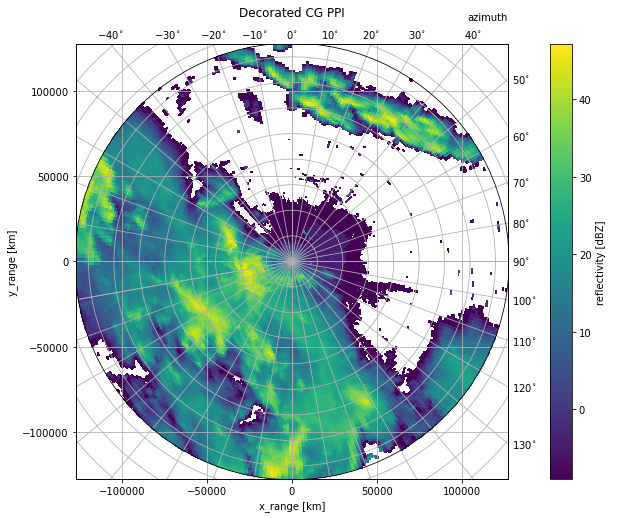

In [5]:
cg={'radial_spacing': 14.,
    'latmin': 10e3}
fig = pl.figure(figsize=(10,8))
cgax, pm = wrl.vis.plot_ppi(ma, r=r, az=az, fig=fig, proj='cg')
caax = cgax.parasites[0]
paax = cgax.parasites[1]

t = pl.title('Decorated CG PPI', y=1.05)
cbar = pl.gcf().colorbar(pm, pad=0.075, ax=paax)
caax.set_xlabel('x_range [km]')
caax.set_ylabel('y_range [km]')
pl.text(1.0, 1.05, 'azimuth', transform=caax.transAxes, va='bottom', 
        ha='right')
cbar.set_label('reflectivity [dBZ]')

### Sector CG PPI

What if I want to plot only an interesting sector of the whole **PPI**? Not as easy, one might think. Note, that we can use `infer_intervals = True` here to get nice grid cell alignment.
We also can generate a so called floating axis using the ``cgax`` now. Here we go:

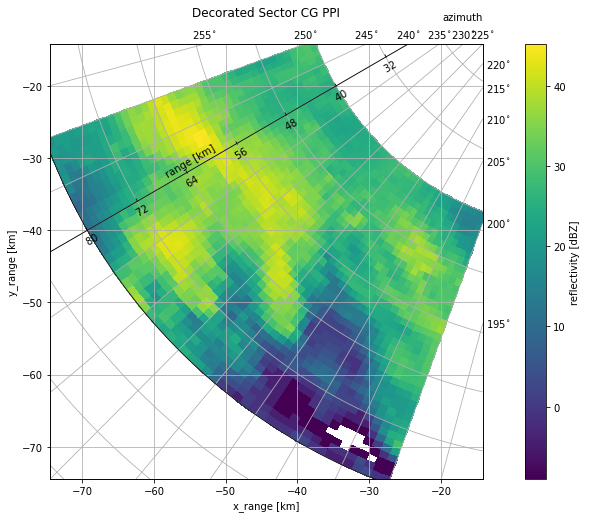

In [6]:
cg={'angular_spacing': 20.}
fig = pl.figure(figsize=(10,8))
cgax, pm = wrl.vis.plot_ppi(ma[200:250, 40:80],
                            r=r[40:80], az=az[200:250],
                            fig=fig, proj=cg, rf=1e3, 
                            infer_intervals=True,
                           )
caax = cgax.parasites[0]
paax = cgax.parasites[1]

t = pl.title('Decorated Sector CG PPI', y=1.05)
cbar = pl.gcf().colorbar(pm, pad=0.075, ax=paax)
caax.set_xlabel('x_range [km]')
caax.set_ylabel('y_range [km]')
pl.text(1.0, 1.05, 'azimuth', transform=caax.transAxes, va='bottom',
        ha='right')
cbar.set_label('reflectivity [dBZ]')

# add floating axis
cgax.axis["lat"] = cgax.new_floating_axis(0, 240)
cgax.axis["lat"].set_ticklabel_direction('-')
cgax.axis["lat"].label.set_text("range [km]")
cgax.axis["lat"].label.set_rotation(180)
cgax.axis["lat"].label.set_pad(10)

### Special Markers

One more good thing about curvelinear axes is that you can plot polar as well as cartesian data. However,
you have to be careful, where to plot. Polar data has to be plottet to the parasite axis (``paax``). Cartesian
data can be plottet to ``caax``, although you can also plot cartesian data to the main ``cgax``.

Anyway, it is easy to overlay your polar data, with other station data (e.g. gauges).
Taking the former sector example, we can plot some additional **stations**:

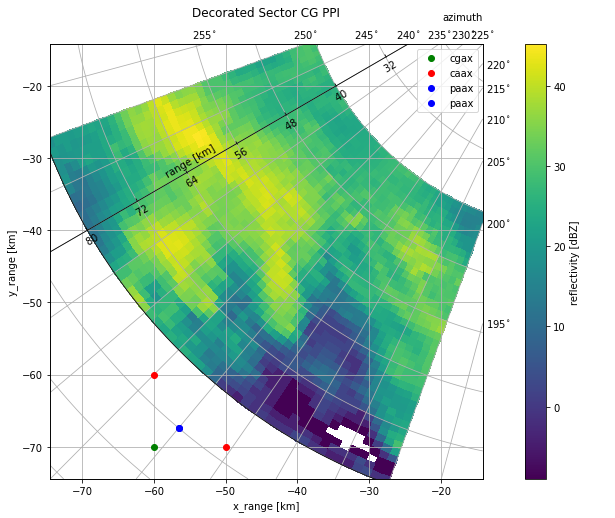

In [7]:
fig = pl.figure(figsize=(10,8))
cg = {'angular_spacing': 20.}
cgax, pm = wrl.vis.plot_ppi(ma[200:250, 40:80],
                            r[40:80], az[200:250],
                            fig=fig, proj=cg, rf=1000., infer_intervals=True)
caax = cgax.parasites[0]
paax = cgax.parasites[1]
t = pl.title('Decorated Sector CG PPI', y=1.05)
cbar = pl.gcf().colorbar(pm, pad=0.075, ax=paax)
caax.set_xlabel('x_range [km]')
caax.set_ylabel('y_range [km]')
pl.text(1.0, 1.05, 'azimuth', transform=caax.transAxes, va='bottom',
        ha='right')
cbar.set_label('reflectivity [dBZ]')
cgax.axis["lat"] = cgax.new_floating_axis(0, 240)
cgax.axis["lat"].set_ticklabel_direction('-')
cgax.axis["lat"].label.set_text("range [km]")
cgax.axis["lat"].label.set_rotation(180)
cgax.axis["lat"].label.set_pad(10)
#plot on cartesian axis
caax.plot(-60, -60, 'ro', label="caax")
caax.plot(-50, -70, 'ro')
# plot on polar axis
paax.plot(220, 88, 'bo', label="paax")
# plot on cg axis (same as on cartesian axis)
cgax.plot(-60, -70, 'go', label="cgax")
# legend on main cg axis
cgax.legend()

### Special Specials

But there is more to know, when using the curvelinear grids! As an example, you can get access to the underlying
``cgax`` and ``grid_helper`` to change azimuth and range resolution as well as tick labels:

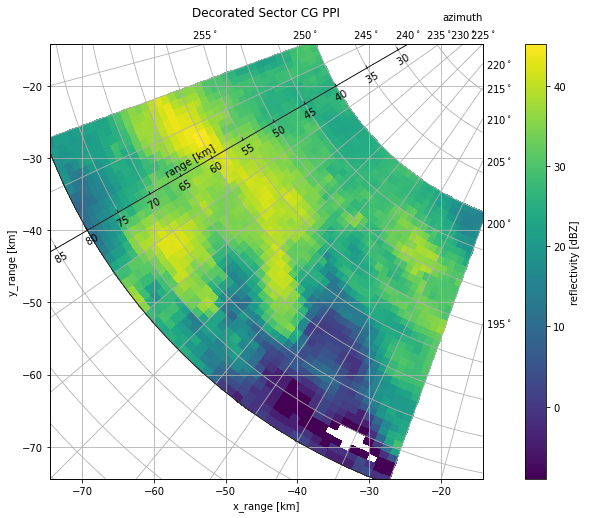

In [8]:
from mpl_toolkits.axisartist.grid_finder import FixedLocator, DictFormatter
#cg = {'lon_cycle': 360.}
cg = {'angular_spacing': 20.}
fig = pl.figure(figsize=(10,8))
cgax, pm = wrl.vis.plot_ppi(ma[200:250, 40:80],
                            r[40:80], az[200:250], rf=1e3,
                            fig=fig, proj=cg, infer_intervals=True)
caax = cgax.parasites[0]
paax = cgax.parasites[1]

t = pl.title('Decorated Sector CG PPI', y=1.05)
t.set_y(1.05)
cbar = pl.gcf().colorbar(pm, pad=0.075, ax=paax)
caax.set_xlabel('x_range [km]')
caax.set_ylabel('y_range [km]')
pl.text(1.0, 1.05, 'azimuth', transform=caax.transAxes, va='bottom',
        ha='right')
cbar.set_label('reflectivity [dBZ]')
gh = cgax.get_grid_helper()
# set azimuth resolution to 15deg
locs = [i for i in np.arange(0., 360., 5.)]
gh.grid_finder.grid_locator1 = FixedLocator(locs)
gh.grid_finder.tick_formatter1 = DictFormatter(dict([(i, r"${0:.0f}^\circ$".format(i)) for i in locs]))
gh.grid_finder.grid_locator2._nbins = 20
gh.grid_finder.grid_locator2._steps = [1, 1.5, 2, 2.5, 5, 10]
cgax.axis["lat"] = cgax.new_floating_axis(0, 240)
cgax.axis["lat"].set_ticklabel_direction('-')
cgax.axis["lat"].label.set_text("range [km]")
cgax.axis["lat"].label.set_rotation(180)
cgax.axis["lat"].label.set_pad(10)

The use of ``FixedLocator`` and ``DictFormatter`` should be clear. The use of `_nbins` and ``_steps`` is
a bit of head-twisting. With ``_steps`` you can set the possible divisions of the range. In connection with
the ``_nbins`` the range grid is created depending on maximum range. In the above situation with ``_nbins``
set to 10 we get an range grid resolution of 25 (divider 2.5). When setting steps to 20 we get a resolution
of 15 (divider 1.5). Choosing 30 lead to resolution of 10 (divider 1/10). So it may be good to play around
a bit, for wanted results.

As you might have noticed the cartesian grid remained the same and the azimuth labels are bit overplottet.
But matplotlib would be not matplotlib if there would be no solution. First we take care of the labeling.
We push the title a bit higher to get space and toggle the ``caax`` labels to right and top:

```python
    t = plt.title('Very Special Sector CG PPI', y=1.1)
    caax.toggle_axisline()
```

Then we **toggle** "left" and "right" and "top" and "bottom" axis behaviour. We also have to put the colorbar a bit to the side and alter the location of the azimuth label. And, not to forgot to adapt the ticklabels of the cartesian axes. With little effort we got a better (IMHO) representation.

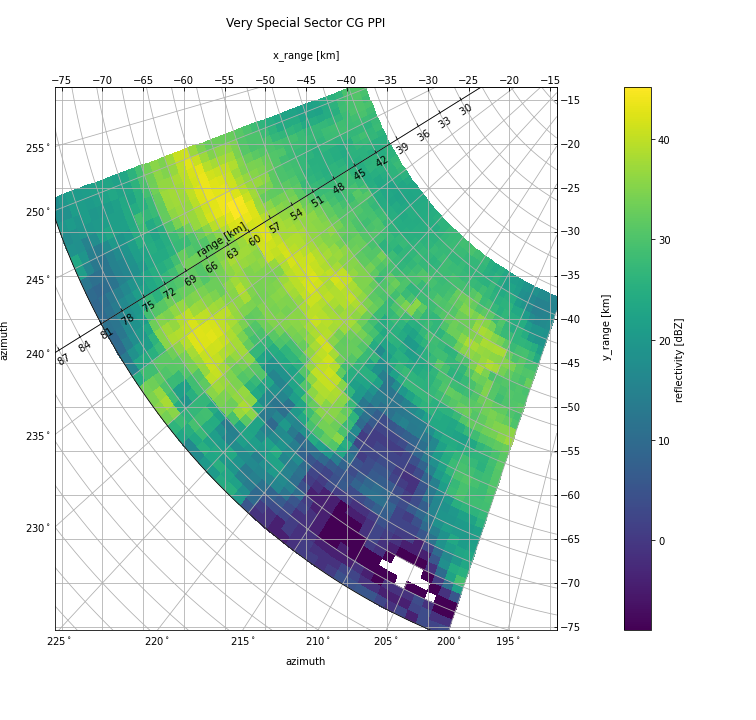

In [9]:
fig = pl.figure(figsize=(12,10))
cg = {'angular_spacing': 20.}
cgax, pm = wrl.vis.plot_ppi(ma[200:251, 40:81],
                            r[40:81], az[200:251], rf=1e3,
                            fig=fig, proj=cg, infer_intervals=True)
caax = cgax.parasites[0]
paax = cgax.parasites[1]

t = pl.title('Very Special Sector CG PPI', y=1.1)
cbar = pl.gcf().colorbar(pm, pad=0.1, ax=paax)
pl.text(0.5, 1.05, 'x_range [km]', transform=caax.transAxes, va='bottom',
        ha='center')
pl.text(1.1, 0.5, 'y_range [km]', transform=caax.transAxes, va='bottom',
        ha='center', rotation='vertical')
caax.set_xlabel('x_range [km]')
caax.set_ylabel('y_range [km]')
caax.toggle_axisline()


# make ticklabels of right and top axis visible
caax.axis["top", "right"].set_visible(True)
caax.axis["top", "right"].major_ticklabels.set_visible(True)
caax.grid(True)

from matplotlib.ticker import MaxNLocator
caax.xaxis.set_major_locator(MaxNLocator(15))
caax.yaxis.set_major_locator(MaxNLocator(15))

# make ticklabels of left and bottom axis visible,
cgax.axis["left"].major_ticklabels.set_visible(True)
cgax.axis["bottom"].major_ticklabels.set_visible(True)
cgax.axis["left"].get_helper().nth_coord_ticks = 0
cgax.axis["bottom"].get_helper().nth_coord_ticks = 0
# and also set tickmarklength to zero for better presentation
cgax.axis["right"].major_ticks.set_ticksize(0)
cgax.axis["top"].major_ticks.set_ticksize(0)
# make ticklabels of right and top axis unvisible,
cgax.axis["right"].major_ticklabels.set_visible(False)
cgax.axis["top"].major_ticklabels.set_visible(False)
# and also set tickmarklength to zero for better presentation
cgax.axis["right"].major_ticks.set_ticksize(0)
cgax.axis["top"].major_ticks.set_ticksize(0)
pl.text(0.5, -0.065, 'azimuth', transform=caax.transAxes, va='bottom',
        ha='center')
pl.text(-0.1, 0.5, 'azimuth', transform=caax.transAxes, va='bottom',
        ha='center', rotation='vertical')
cbar.set_label('reflectivity [dBZ]')

gh = cgax.get_grid_helper()
# set azimuth resolution to 5deg
locs = [i for i in np.arange(0., 360., 5.)]
gh.grid_finder.grid_locator1 = FixedLocator(locs)
gh.grid_finder.tick_formatter1 = DictFormatter(dict([(i, r"${0:.0f}^\circ$".format(i)) for i in locs]))
gh.grid_finder.grid_locator2._nbins = 30
gh.grid_finder.grid_locator2._steps = [1, 1.5, 2, 2.5, 5, 10]
cgax.axis["lat"] = cgax.new_floating_axis(0, 240)
cgax.axis["lat"].set_ticklabel_direction('-')
cgax.axis["lat"].label.set_text("range [km]")
cgax.axis["lat"].label.set_rotation(180)
cgax.axis["lat"].label.set_pad(10)
pl.tight_layout()

## Plot CG RHI

[wradlib.vis.plot_rhi()](https://docs.wradlib.org/en/latest/generated/wradlib.vis.plot_rhi.html) is used in this section.
An CG RHI plot is a little different compared to an CG PPI plot. I covers only one quadrant and
the data is plottet counterclockwise from "east" (3 o'clock) to "north" (12 o'clock).

Everything else is much the same and you can do whatever you want as shown in the section [Plot CG PPI](#Plot-CG-PPI).

So just a quick example of an cg rhi plot with some decorations. Note, the ``grid_locator1`` for the theta angles is overwritten and now the grid is much finer.

In [10]:
from mpl_toolkits.axisartist.grid_finder import FixedLocator, DictFormatter
# reading in GAMIC hdf5 file
filename = wrl.util.get_wradlib_data_file('hdf5/2014-06-09--185000.rhi.mvol')
data1, metadata = wrl.io.read_gamic_hdf5(filename)
data1 = data1['SCAN0']['ZH']['data']
r = metadata['SCAN0']['r']
th = metadata['SCAN0']['el']
az = metadata['SCAN0']['az']
site = (metadata['VOL']['Longitude'], metadata['VOL']['Latitude'],
        metadata['VOL']['Height'])
# mask data array for better presentation
mask_ind = np.where(data1 <= np.nanmin(data1))
data1[mask_ind] = np.nan
ma1 = np.ma.array(data1, mask=np.isnan(data1))

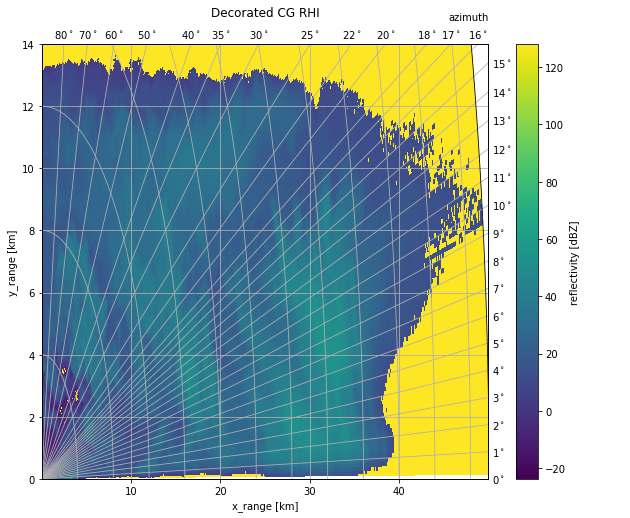

In [11]:
fig = pl.figure(figsize=(10,8))
cgax, pm = wrl.vis.plot_rhi(ma1, r=r, th=th, rf=1e3, fig=fig, ax=111, proj='cg')
caax = cgax.parasites[0]
paax = cgax.parasites[1]

t = pl.title('Decorated CG RHI', y=1.05)
cgax.set_ylim(0, 14)
cbar = pl.gcf().colorbar(pm, pad=0.05, ax=paax)
cbar.set_label('reflectivity [dBZ]')
caax.set_xlabel('x_range [km]')
caax.set_ylabel('y_range [km]')
pl.text(1.0, 1.05, 'azimuth', transform=caax.transAxes, va='bottom',
        ha='right')
gh = cgax.get_grid_helper()

# set theta to some nice values
locs = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14.,
                15., 16., 17., 18., 20., 22., 25., 30., 35.,  40., 50., 60., 70., 80., 90.]
gh.grid_finder.grid_locator1 = FixedLocator(locs)
gh.grid_finder.tick_formatter1 = DictFormatter(dict([(i, r"${0:.0f}^\circ$".format(i)) for i in locs]))

## Plotting on Grids

There are serveral possibilities to plot multiple cg plots in one figure. Since both plotting routines
are equipped with the same mechanisms it is concentrated mostly on **RHI** plots.

<div class="alert alert-info">

**Note** <br>

Using the :func:`tight_layout` and :func:`subplots_adjust` functions most alignment problems can be avoided.

</div>

* [The Built-In Method](#The-Built-In-Method)
* [The GridSpec Method](#The-GridSpec-Method)
* [The AxesDivider Method](#The-AxesDivider-Method)

### The Built-In Method

Using the matplotlib grid definition for the parameter ``subplot``, we can easily plot two or more plots
in one figure on a regular grid:

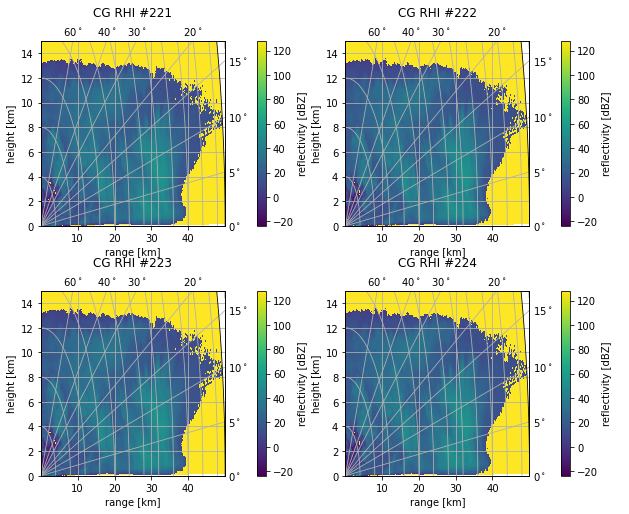

In [12]:
subplots = [221, 222, 223, 224]
fig = pl.figure(figsize=(10,8))
fig.subplots_adjust(wspace=0.2, hspace=0.35)
for sp in subplots:
    cgax, pm = wrl.vis.plot_rhi(ma1, r, th, rf=1e3, ax=sp, proj='cg')
    caax = cgax.parasites[0]
    paax = cgax.parasites[1]
    t = pl.title('CG RHI #%(sp)d' %locals(), y=1.1)
    cgax.set_ylim(0, 15)
    cbar = pl.gcf().colorbar(pm, pad=0.125, ax=paax)
    caax.set_xlabel('range [km]')
    caax.set_ylabel('height [km]')
    gh = cgax.get_grid_helper()
    # set theta to some nice values
    locs = [0., 5., 10., 15., 20., 30., 40., 60., 90.]
    gh.grid_finder.grid_locator1 = FixedLocator(locs)
    gh.grid_finder.tick_formatter1 = DictFormatter(dict([(i, r"${0:.0f}^\circ$".format(i)) for i in locs]))
    cbar.set_label('reflectivity [dBZ]')

### The GridSpec Method

Here the abilities of [Matplotlib GridSpec](https://matplotlib.org/tutorials/intermediate/gridspec.html) are used.
Now we can also plot on irregular grids. Just create your grid and take the GridSpec object as an input to the parameter ``ax`` as follows (some padding has to be adjusted to get a nice plot):

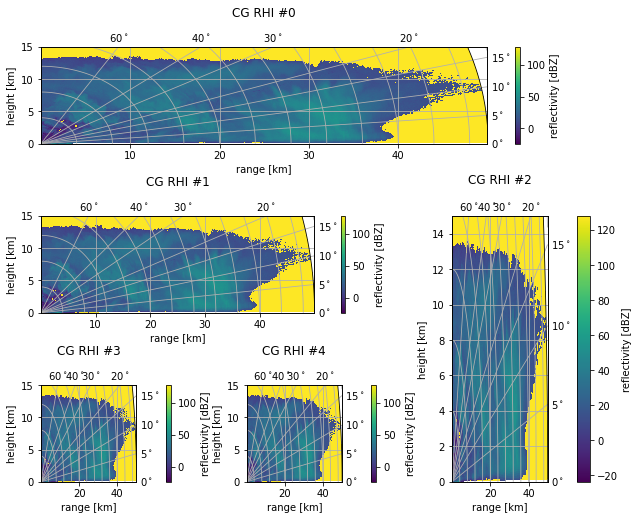

In [13]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3, hspace=0.75, wspace=0.4)
subplots = [gs[0, :], gs[1, :-1], gs[1:, -1], gs[-1, 0], gs[-1, -2]]
cbarpad = [0.05, 0.075, 0.2, 0.2, 0.2]
labelpad = [1.25, 1.25, 1.1, 1.25, 1.25]
fig = pl.figure(figsize=(10,8))
for i, sp in enumerate(subplots):
    cgax, pm = wrl.vis.plot_rhi(ma1, r, th, rf=1e3, ax=sp, proj='cg')
    caax = cgax.parasites[0]
    paax = cgax.parasites[1]
    t = pl.title('CG RHI #%(i)d' %locals(), y=labelpad[i])
    cgax.set_ylim(0, 15)
    cbar = fig.colorbar(pm, pad=cbarpad[i], ax=paax)
    caax.set_xlabel('range [km]')
    caax.set_ylabel('height [km]')
    gh = cgax.get_grid_helper()
    # set theta to some nice values
    locs = [0., 5., 10., 15., 20., 30., 40., 60., 90.]
    gh.grid_finder.grid_locator1 = FixedLocator(locs)
    gh.grid_finder.tick_formatter1 = DictFormatter(dict([(i, r"${0:.0f}^\circ$".format(i)) for i in locs]))
    cbar.set_label('reflectivity [dBZ]')

### The AxesDivider Method

Here the capabilities of [Matplotlib AxesGrid1](https://matplotlib.org/tutorials/toolkits/axes_grid.html) are used.

We make a **PPI** now, it matches much better. Just plot your **PPI** data and create an axes divider:

```python
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib.ticker import NullFormatter, FuncFormatter, MaxNLocator
    divider = make_axes_locatable(cgax)
```

Now you can easily append more axes to plot some other things, eg a maximum intensity projection:

```python
    axMipX = divider.append_axes("top", size=1.2, pad=0.1, sharex=cgax))
    axMipY = divider.append_axes("right", size=1.2, pad=0.1, sharey=cgax))
```

OK, we have to create the mip data, we use the [wradlib.georef.polar.maximum_intensity_projection()](https://docs.wradlib.org/en/latest/generated/wradlib.georef.polar.maximum_intensity_projection.html):

In [14]:
# angle of *cut* through ppi and scan elev.
angle = 0.0
elev = 0.0

filename = wrl.util.get_wradlib_data_file('misc/polar_dBZ_tur.gz')
data2 = np.loadtxt(filename)
# we need to have meter here for the georef function inside mip
d1 = np.arange(data2.shape[1], dtype=np.float) * 1000
d2 = np.arange(data2.shape[0], dtype=np.float)
data2 = np.roll(data2, (d2 >= angle).nonzero()[0][0], axis=0)

# calculate max intensity proj
xs, ys, mip1 = wrl.util.maximum_intensity_projection(data2, r=d1, az=d2, angle=angle, elev=elev)
xs, ys, mip2 = wrl.util.maximum_intensity_projection(data2, r=d1, az=d2, angle=90+angle, elev=elev)

We also need a new formatter:

In [15]:
def mip_formatter(x, pos):
    x = x / 1000.
    fmt_str = '{:g}'.format(x)
    if np.abs(x) > 0 and np.abs(x) < 1:
        return fmt_str.replace("0", "", 1)
    else:
        return fmt_str

<div class="alert alert-warning">
    
**Warning** <br>

As of matplotlib version 3.3.0 AxesDivider Method is broken for plots with twin/parasite axes. The following plot is done with normal axes.
</div>

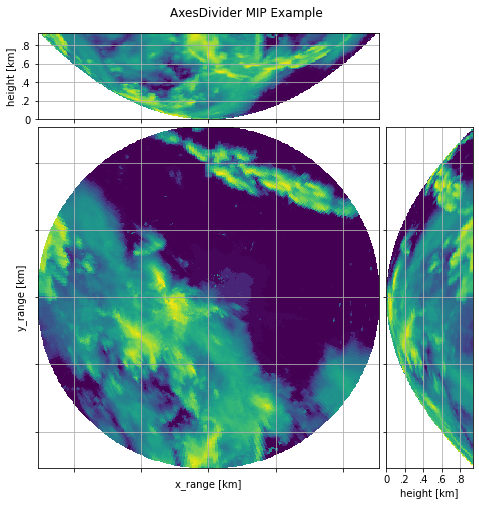

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter, FuncFormatter, MaxNLocator

fig = pl.figure(figsize=(10,8))
# normal cg plot
cgax, pm = wrl.vis.plot_ppi(data2, r=d1, az=d2, fig=fig)#, proj={'latmin': 10000., 
                                                        #       'radial_spacing': 12})
caax = cgax#.parasites[0]
paax = cgax#.parasites[1]

cgax.grid(True)

cgax.set_xlim(-np.max(d1),np.max(d1))
cgax.set_ylim(-np.max(d1),np.max(d1))
caax.xaxis.set_major_formatter(FuncFormatter(mip_formatter))
caax.yaxis.set_major_formatter(FuncFormatter(mip_formatter))
caax.set_xlabel('x_range [km]')
caax.set_ylabel('y_range [km]')

# axes divider section
divider = make_axes_locatable(cgax)
axMipX = divider.append_axes("top", size=1.2, pad=0.1, sharex=cgax)
axMipY = divider.append_axes("right", size=1.2, pad=0.1, sharey=cgax)

# special handling for labels etc.
#cgax.axis["right"].major_ticklabels.set_visible(False)
#cgax.axis["top"].major_ticklabels.set_visible(False)
axMipX.xaxis.set_major_formatter(NullFormatter())
axMipX.yaxis.set_major_formatter(FuncFormatter(mip_formatter))
axMipX.yaxis.set_major_locator(MaxNLocator(5))
axMipY.yaxis.set_major_formatter(NullFormatter())
axMipY.xaxis.set_major_formatter(FuncFormatter(mip_formatter))
axMipY.xaxis.set_major_locator(MaxNLocator(5))

# plot max intensity proj
ma = np.ma.array(mip1, mask=np.isnan(mip1))
axMipX.pcolormesh(xs, ys, ma)
ma = np.ma.array(mip2, mask=np.isnan(mip2))
axMipY.pcolormesh(ys.T, xs.T, ma.T)

# set labels, limits etc
axMipX.set_xlim(-np.max(d1),np.max(d1))
er = 6370000. 
axMipX.set_ylim(0, wrl.georef.bin_altitude(d1[-2], elev, 0, re=er))
axMipY.set_xlim(0, wrl.georef.bin_altitude(d1[-2], elev, 0, re=er))
axMipY.set_ylim(-np.max(d1),np.max(d1))
axMipX.set_ylabel('height [km]')
axMipY.set_xlabel('height [km]')
axMipX.grid(True)
axMipY.grid(True)
t = pl.gcf().suptitle('AxesDivider MIP Example')
t.set_y(0.925)